# Test of the Ben Sira package
## Import :

In [1]:
from pkg.Variant import VariantsFinder
from pkg.Witness import Witness
from pkg.Stats import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Constantes :

To update depending of the manuscript :

In [2]:
UNWANTED_TAGS = ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                    "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                    "margin_supralinear","Article"]

TO UNDERSTAND THE XML FILES :

                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->

## Exemples :

In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
folder = "WorkDir/"

First we create a `VariantsFinder` object. At this creation, the object will match all chapters and verses, clean the verses and compute the collations and the distances for each verses :

In [4]:
vf = VariantsFinder(fileNames, UNWANTED_TAGS, folder = folder)

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done
##### Errors Classification Done


We give a random exemple. It is important to note that the representation use here is simple_SVG, the normal SVG generating a lot of unwanted errors.

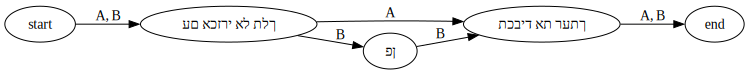

In [5]:
vf.getSampleVariant()

The following exemple will run on the first witness, to test the different representation.

In [5]:
test = vf.witnesses[1]
print(test)

Verse 20 : aligned
+---+---+-------------------------------+-----------+
| A |   | בין אחים ראשם נכבד וירא אלהים | בעינ      |
| B | - | בין אחים ראשם נכבד וירא אלהים | נכבד ממנו |
+---+---+-------------------------------+-----------+


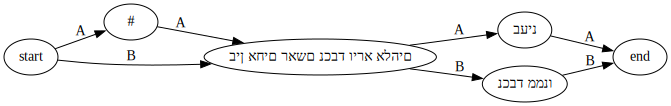

In [6]:
test.getSVG()

In [7]:
test.getHTML()

A,,בין אחים ראשם נכבד וירא אלהים,בעינ
B,-,בין אחים ראשם נכבד וירא אלהים,נכבד ממנו


In [8]:
print(test.getCSV())

A, ,בין אחים ראשם נכבד וירא אלהים ,בעינ
B,,בין אחים ראשם נכבד וירא אלהים ,נכבד ממנו



The following exemple show the DataFrame of the `VariantsFinder` object.

In [9]:
df = vf.getDF()
df

,Verse A,Verse B,Variant A,Variant B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming,Inversion,Difference
0,ש מושל ושופט נכבדו ואן גדול מרא אלהים,שר שופט ומושל נכבדו וא גד,"[, ש, מושל, ושופט, ואן, גדול, מרא, אלהים]","[שר, שופט, ומושל, וא, גד]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,24,17,22,None,+ שר\n- ש\n- מושל\n- ושופט\n? -\n\n+ שופט\n+ ו...
1,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,"[, בעינ]","[נכבד, ממנו]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8,None,בין\n אחים\n ראשם\n נכבד\n וירא\n אלהים...
2,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל,"[, יש, עשרו]","[איש, עשיר]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,30,3,7,None,- יש\n דל\n נכבד\n בגלל\n שכלו\n ויש\n+ א...
3,בני בענוה כבד נפשך ויתן לך טם כיוצא בﬣ,בני בענוה כבד נפשך ותן לה טעם כיוצ,"[, ויתן, לך, טם, כיוצא, בﬣ]","[ותן, לה, טעם, כיוצ]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,28,6,9,None,בני\n בענוה\n כבד\n נפשך\n- ויתן\n? -\n\...
4,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,"[, נכבד]","[הנכבד, בעיניו, בעשרו]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,31,12,16,None,- נכבד\n+ הנכבד\n? +\n\n+ בעיניו\n בעשרו\n א...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,שונא תורה ומתמוטט כמסערה,לא יחכם שונא תורה ומתמוטט כמסערה,[],"[לא, יחכם]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,2,6,6,None,+ לא\n+ יחכם\n שונא\n תורה\n ומתמוטט\n כמסערה
149,ר ואחר תעשה ובית מנוח ואחר תגיה,הכין אומר ואחר תעשה ובית מנוח ואחר תגיה,[ר],"[הכין, אומר]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,4,7,8,None,- ר\n+ הכין\n+ אומר\n ואחר\n תעשה\n ובית\n ...
150,מת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מוע,"[מת, מועד]","[אבל, מוע]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,8,4,6,None,- מת\n+ אבל\n בחכמת\n ייי\n נשפטו\n ויש\n ...
151,אוהב שונא תחת כל יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,[],"[כסוס, מוכן, אוהב]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,6,12,12,None,+ כסוס\n+ מוכן\n אוהב\n שונא\n תחת\n כל\n+...


Finally, here is an exemple of the mardown and csv export. By default, the variants are saved under the files `"Variants.md"` and `"Variants.csv"`.

In [11]:
vf.getCSV()
vf.getMarkdown()

## Statistiques :

In [88]:
import numpy as np

stats_df = df[["Manuscript A", "Chapter A","Manuscript B", "Chapter B","Verse A", "Verse B", "Variant A", "Variant B"]]


#create subdataframes for all manuscripts

stats_df_a = stats_df[stats_df['Manuscript A'] == 'ms_a_new.xml']
stats_df_b = stats_df[(stats_df['Manuscript A'] == 'ms_b_new.xml') | (stats_df['Manuscript B'] =='ms_b_new.xml')]
stats_df_c = stats_df[(stats_df['Manuscript A'] == 'ms_c_new.xml') | (stats_df['Manuscript B'] =='ms_c_new.xml')] #no data for manuscript C exists in df
stats_df_d = stats_df[(stats_df['Manuscript A'] == 'ms_d_new.xml') | (stats_df['Manuscript B'] =='ms_d_new.xml')]
stats_df_e = stats_df[(stats_df['Manuscript A'] == 'ms_e_new.xml') | (stats_df['Manuscript B'] =='ms_e_new.xml')]
stats_df_f = stats_df[(stats_df['Manuscript A'] == 'ms_f_new.xml') | (stats_df['Manuscript B'] =='ms_f_new.xml')]

In [89]:
stats_df_f

,Manuscript A,Chapter A,Manuscript B,Chapter B,Verse A,Verse B,Variant A,Variant B
113,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,רע על לחם ירגז בשער דעת רועו נאמנה,בשער ...,"[רע, על, לחם, ירגז, דעת, רועו, נאמנה]",[]
114,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,שמחת לב וששון ועדוי יין נשתה בעתו ודאי,חת לב וששון ועדוי יין נשאר ב,"[שמחת, נשתה, בעתו, ודאי]","[חת, נשאר, ב]"
115,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,במשתה היין אל תוכח רע ואל תוגהו בחדותו,במשתה יין אל תוכח רֵעַ ואל תוגַהו בחדותו,"[היין, רע, תוגהו]","[יין, ר, ֵ, ע, ַ, תוג, ַ, הו]"
116,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,וגם על היין אל תתגבר כי רבים הכשיל תירוש,בר רבים,"[וגם, על, היין, אל, תתגבר, כי, הכשיל, תירוש]",[בר]
117,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,כאב ראש לענה וקלון יין נשתה בתחרה וכעס,כאב ראש לענה ורוש יין נשתה בחרי,"[וקלון, בתחרה, וכעס]","[ורוש, בחרי]"
118,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,כור בוחן מעשה לוטש כן היין למצות לצים,מעשה לוטש כן היין למצ ...,"[כור, בוחן, למצות, לצים]",[למצ]
119,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,למי היין חיים לאנוש אם ישתנו במתכנתו,חיים לאנוש אם ישתנו,"[למי, היין, במתכנתו]",[]
120,ms_b_new.xml,Siracide 31,ms_f_new.xml,Siracide 31,מרבה חמר לכסיל מוקש מחסר כח ומספק פצע,מרבה חמד לכסיל נוקש מחסר כח ומספיק,"[חמר, מוקש, ומספק, פצע]","[חמד, נוקש, ומספיק]"
121,ms_b_new.xml,Siracide 32,ms_f_new.xml,chapter 32,דבר נער אם צריך אתה בחזק פעמים ושלש אם ישאלך,ר נער צורך אותך פעמים ושלש אם ישאלך,"[דבר, אם, צריך, אתה, בחזק]","[ר, צורך, אותך]"
122,ms_b_new.xml,Siracide 32,ms_f_new.xml,chapter 32,איש חכם יטה תוכחות ואחר צרכו ימשך תורה,איש חמס יטה תוכחות ויאחר צרכו למשך תורה,"[חכם, ואחר, ימשך]","[חמס, ויאחר, למשך]"


In [90]:
#refining the subdataframes to fit our requirements (making the first mauscript as b,c,d,e or f, as needed)

idx_b = (stats_df_b['Manuscript B'] == 'ms_b_new.xml')
stats_df_b.loc[idx_b,['Verse A','Verse B']] = stats_df_b.loc[idx_b,['Verse B', 'Verse A']].values
stats_df_b.loc[idx_b,['Variant A','Variant B']] = stats_df_b.loc[idx_b,['Variant B','Variant A']].values
stats_df_b.loc[idx_b,['Chapter A','Chapter B']] = stats_df_b.loc[idx_b,['Chapter B','Chapter A']].values
stats_df_b.loc[idx_b,['Manuscript A','Manuscript B']] = stats_df_b.loc[idx_b,['Manuscript B','Manuscript A']].values


idx_d = (stats_df_d['Manuscript B'] == 'ms_d_new.xml')
stats_df_d.loc[idx_d,['Verse A','Verse B']] = stats_df_d.loc[idx_d,['Verse B','Verse A']].values
stats_df_d.loc[idx_d,['Variant A','Variant B']] = stats_df_d.loc[idx_d,['Variant B','Variant A']].values
stats_df_d.loc[idx_d,['Chapter A','Chapter B']] = stats_df_d.loc[idx_d,['Chapter B','Chapter A']].values
stats_df_d.loc[idx_d,['Manuscript A','Manuscript B']] = stats_df_d.loc[idx_d,['Manuscript B','Manuscript A']].values

idx_e = (stats_df_e['Manuscript B'] == 'ms_e_new.xml')
stats_df_e.loc[idx_e,['Verse A','Verse B']] = stats_df_e.loc[idx_e,['Verse B','Verse A']].values
stats_df_e.loc[idx_e,['Variant A','Variant B']] = stats_df_e.loc[idx_e,['Variant B','Variant A']].values
stats_df_e.loc[idx_e,['Chapter A','Chapter B']] = stats_df_e.loc[idx_e,['Chapter B','Chapter A']].values
stats_df_e.loc[idx_e,['Manuscript A','Manuscript B']] = stats_df_e.loc[idx_e,['Manuscript B','Manuscript A']].values


idx_f = (stats_df_f['Manuscript B'] == 'ms_f_new.xml')
stats_df_f.loc[idx_f,['Verse A','Verse B']] = stats_df_f.loc[idx_f,['Verse B','Verse A']].values
stats_df_f.loc[idx_f,['Variant A','Variant B']] = stats_df_f.loc[idx_f,['Variant B','Variant A']].values
stats_df_f.loc[idx_f,['Chapter A','Chapter B']] = stats_df_f.loc[idx_f,['Chapter B','Chapter A']].values
stats_df_f.loc[idx_f,['Manuscript A','Manuscript B']] = stats_df_f.loc[idx_f,['Manuscript B','Manuscript A']].values

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3960\3967616992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_b.loc[idx_b,['Verse A','Verse B']] = stats_df_b.loc[idx_b,['Verse B', 'Verse A']].values
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3960\3967616992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_b.loc[idx_b,['Variant A','Variant B']] = stats_df_b.loc[idx_b,['Variant B','Variant A']].values
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3960\3967616992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [91]:
stats_df_f

,Manuscript A,Chapter A,Manuscript B,Chapter B,Verse A,Verse B,Variant A,Variant B
113,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,בשער ...,רע על לחם ירגז בשער דעת רועו נאמנה,[],"[רע, על, לחם, ירגז, דעת, רועו, נאמנה]"
114,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,חת לב וששון ועדוי יין נשאר ב,שמחת לב וששון ועדוי יין נשתה בעתו ודאי,"[חת, נשאר, ב]","[שמחת, נשתה, בעתו, ודאי]"
115,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,במשתה יין אל תוכח רֵעַ ואל תוגַהו בחדותו,במשתה היין אל תוכח רע ואל תוגהו בחדותו,"[יין, ר, ֵ, ע, ַ, תוג, ַ, הו]","[היין, רע, תוגהו]"
116,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,בר רבים,וגם על היין אל תתגבר כי רבים הכשיל תירוש,[בר],"[וגם, על, היין, אל, תתגבר, כי, הכשיל, תירוש]"
117,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,כאב ראש לענה ורוש יין נשתה בחרי,כאב ראש לענה וקלון יין נשתה בתחרה וכעס,"[ורוש, בחרי]","[וקלון, בתחרה, וכעס]"
118,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,מעשה לוטש כן היין למצ ...,כור בוחן מעשה לוטש כן היין למצות לצים,[למצ],"[כור, בוחן, למצות, לצים]"
119,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,חיים לאנוש אם ישתנו,למי היין חיים לאנוש אם ישתנו במתכנתו,[],"[למי, היין, במתכנתו]"
120,ms_f_new.xml,Siracide 31,ms_b_new.xml,Siracide 31,מרבה חמד לכסיל נוקש מחסר כח ומספיק,מרבה חמר לכסיל מוקש מחסר כח ומספק פצע,"[חמד, נוקש, ומספיק]","[חמר, מוקש, ומספק, פצע]"
121,ms_f_new.xml,chapter 32,ms_b_new.xml,Siracide 32,ר נער צורך אותך פעמים ושלש אם ישאלך,דבר נער אם צריך אתה בחזק פעמים ושלש אם ישאלך,"[ר, צורך, אותך]","[דבר, אם, צריך, אתה, בחזק]"
122,ms_f_new.xml,chapter 32,ms_b_new.xml,Siracide 32,איש חמס יטה תוכחות ויאחר צרכו למשך תורה,איש חכם יטה תוכחות ואחר צרכו ימשך תורה,"[חמס, ויאחר, למשך]","[חכם, ואחר, ימשך]"


In [92]:
#calculate average word length of variants
def avg_word_len(df):
    word_count = 0
    sum = 0
    for list in df['Variant A']:
        for word in list:
            word_count = word_count+1
            sum = sum + len(word)

    avg_variant_length_a = sum/word_count    

    return avg_variant_length_a

avg_word_len(stats_df_a), avg_word_len(stats_df_b), avg_word_len(stats_df_d), avg_word_len(stats_df_e), avg_word_len(stats_df_f) 

(2.993710691823899,
 3.6907514450867054,
 2.8,
 3.3181818181818183,
 3.3469387755102042)

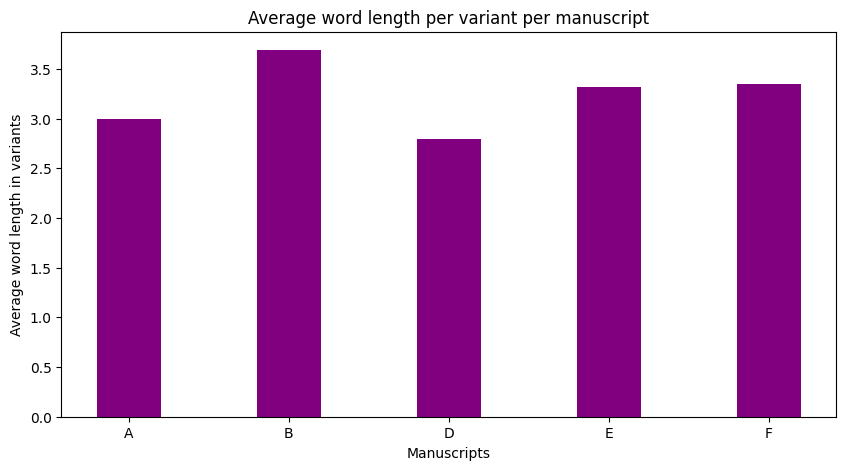

In [93]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'A': avg_word_len(stats_df_a), 'B': avg_word_len(stats_df_b), 'D': avg_word_len(stats_df_d) ,
        'E': avg_word_len(stats_df_e), 'F': avg_word_len(stats_df_f)}
manuscripts = list(data.keys())
avg_variant_word_len = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(manuscripts, avg_variant_word_len, color ='purple',
        width = 0.4)
 
plt.xlabel("Manuscripts")
plt.ylabel("Average word length in variants")
plt.title("Average word length per variant per manuscript")
plt.show()

In [103]:
#number of times the two witnesses are exactly same (comparision for manuscript A)

def exact_match_per(df):

    exact_count = 0
    for text1, text2 in zip(df['Verse A'],df['Verse B']):
        if text1 == text2:
            exact_count = exact_count + 1
   
    perc_exact= (exact_count/len(df['Verse A']))*100
    return perc_exact




#calculating how many times there is a word addition (i.e. an extra word or phrase is added in manuscript a in comparision to other manuscripts)

def word_addition_per(df):
    add_count = 0
    for list in df['Variant B']:
        if len(list) == 0:    
            add_count = add_count+1

    perc_add = (add_count/len(df['Variant B']))*100
    return perc_add

#calculating word deletions 

def word_deletion_per(df):
    add_count = 0
    for list in df['Variant A']:
        if len(list) == 0:    
            add_count = add_count+1

    perc_add = (add_count/len(df['Variant A']))*100
    return perc_add
    

#calculating dittos/repititions of words in witnessess of a manuscript

def word_repitition_per(df):
    count = 0
    for sent in df['Verse A']:
        for i in range(len(sent.split())-1):
            if sent.split()[i] == sent.split()[i+1]:
                count = count+1 

    perc_rep = (count/len(df['Verse A']))*100
    return perc_rep  



#calculating percentage of inversions in the manuscript

def inversion_per(df):

    for text1, text2 in zip(df['Verse A'], df['Verse B']):

        set1 = set(text1.split())
        set2 = set(text2.split())
        count = 0
        if set1 == set2 and len(text1.split()) == len(text2.split()): # check if the sentences have same words and no repeating words
            if text1.split() != text2.split(): # check for inversion if not exact matches
                for i in range(len(text1.split())-2): 
                    if text1.split()[i] == text2.split()[i+1] and text1.split()[i+1] == text2.split()[i]: #check for near inversion when consecutive words are inverted
                        count = count+1

                
                if count > 0:
                    perc_inv = (count/len(df['Verse A']))*100
                    return perc_inv   
 
            else:
                return 'No inversion detected in the manuscript'
            

None


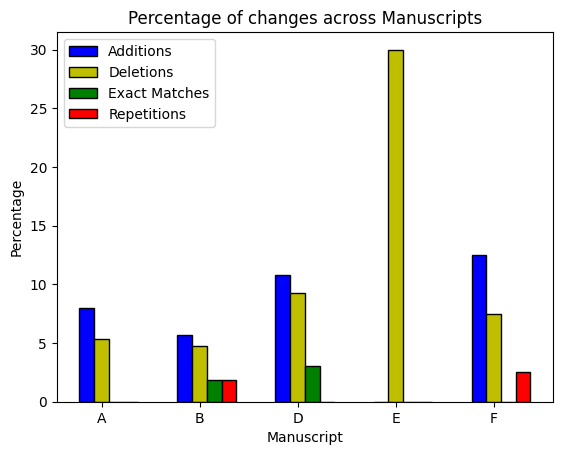

In [108]:
import numpy as np
import matplotlib.pyplot as plt
   
Addition = [word_addition_per(stats_df_a), word_addition_per(stats_df_b), word_addition_per(stats_df_d), word_addition_per(stats_df_e), word_addition_per(stats_df_f)]
Deletion = [word_deletion_per(stats_df_a),word_deletion_per(stats_df_b),word_deletion_per(stats_df_d),word_deletion_per(stats_df_e),word_deletion_per(stats_df_f)]
Exact_matches = [exact_match_per(stats_df_a), exact_match_per(stats_df_b),exact_match_per(stats_df_d), exact_match_per(stats_df_e), exact_match_per(stats_df_f)]
Repetitions = [word_repitition_per(stats_df_a), word_repitition_per(stats_df_b),word_repitition_per(stats_df_d), word_repitition_per(stats_df_e), word_repitition_per(stats_df_f)]
  
n=5
r = np.arange(n)
width = 0.15
  
  
plt.bar(r, Addition, color = 'b',
        width = width, edgecolor = 'black',
        label='Additions')

plt.bar(r+width, Deletion, color = 'y',
        width = width, edgecolor = 'black',
        label='Deletions')

plt.bar(r + 2*width, Exact_matches, color = 'g',
        width = width, edgecolor = 'black',
        label='Exact Matches')
  
plt.bar(r + 3*width, Repetitions, color = 'r',
        width = width, edgecolor = 'black',
        label='Repetitions')


plt.xlabel("Manuscript")
plt.ylabel("Percentage")
plt.title("Percentage of changes across Manuscripts")
  
# plt.grid(linestyle='--')
plt.xticks(r + width,['A','B','D','E', 'F'])
plt.legend()
  
plt.show()

### POS tagging

In [119]:
import spacy

nlp_he = spacy.load("he")

nlp_he.pipe_names

OSError: [E050] Can't find model 'he'. It doesn't seem to be a Python package or a valid path to a data directory.

In [115]:
def pos_tagger(df):

    
        

pos_tagger(stats_df_e)

In [118]:
for text1, text2 in zip(stats_df_d['Verse A'], stats_df_d['Verse B']):
        doc1 = nlp_he(text1)
        doc2 = nlp_he(text2)

        for token1 in doc1:
            print(token1.pos_)
        for token2 in doc2:
            print(token2.pos_)    